#### Observable Trends
1. Cities closest to the equator have the warmest temperatures, with those north of the equator in winter with cold temps and cities south of the equator in summer with warmer temps.
2. There doesn't appear to be a strong correlation between humidity and latitude, though cities overall are more likely to have higher humidity percentages than lower.
3. The outlier highest wind speeds appear to be at the most extremly low and high latitudes.

#### WeatherPy

In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilizing a simple Python library, the OpenWeatherMap API, and a little common sense to create a representative model of weather across world cities.

##### Your objective is to build a series of scatter plots to showcase the following relationships:
* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude


##### Your final notebook must:
* Randomly select at least 500 unique (non-repeat) cities based on latitude and longitude.
* Perform a weather check on each of the cities using a series of successive API calls.
* Include a print log of each city as it's being processed with the city number and city name.
* Save both a CSV of all data retrieved and png images for each scatter plot.


##### As final considerations:
* You must complete your analysis using a Jupyter notebook.
* You must use the Matplotlib or Pandas plotting libraries.
* You must include a written description of three observable trends based on the data.
* You must use proper labeling of your plots, including aspects like: Plot Titles (with date of analysis) and Axes Labels.
* See Example Solution for a reference on expected format.

In [1]:
# dependencies
import matplotlib.pyplot as plt
import requests
import json
import pandas as pd
from config import weather_api_key
!pip install citipy
from citipy import citipy
import numpy as np

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 19.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
# API details
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

In [3]:
# generate random latitude and longitude list for sample cities

lat_coords = np.random.uniform(low=-90.000, high=90.000, size=700)
lon_coords = np.random.uniform(low=-180.000, high=180.000, size=700)
print(lat_coords)
print(lon_coords)

[  6.03875649  78.46130165 -18.98119186  27.91475831  61.95648552
 -57.66455907 -61.53431577  24.05149547  45.44239495  62.86390322
  43.3453647   58.37173789 -40.9275534    4.42641641 -12.81236468
 -37.43357232  -0.73989721  68.2278998   64.46348911  80.99165845
 -37.09982832  64.27207331 -72.88432255  44.55306688 -62.84302784
 -10.72895417 -44.7194498   81.0541576  -40.55924227 -70.50904036
  19.07421479  45.61087327  88.67287146 -79.58504295  54.98412428
 -20.38904819  86.4097694  -49.14010421  26.26676019 -84.17491678
 -58.02683789 -88.04024348  68.22562165  22.3293774  -56.07564721
 -74.09719324  32.79205566   9.25779753 -16.92081682  84.97520571
 -71.86714846 -84.80971302  47.99062182 -35.68871124  23.14657816
   8.92847401 -55.48244475 -50.64040188 -21.7713981    1.09381089
 -23.67750589 -61.60819727  -0.44428417  61.89473377 -13.54863616
 -16.65256196 -87.00551963 -32.24514426  77.73481566 -17.63577404
 -79.5403796  -66.41441465 -26.91374431 -58.54472395 -66.56382103
  36.01135

In [4]:
# create list of cities from random lat and lon coordinates
cities = []

for x in range(len(lat_coords)):
    city = citipy.nearest_city(lat_coords[x],lon_coords[x])
    cities.append(city.city_name)
    
print(cities)

['puerto ayora', 'illoqqortoormiut', 'karratha', 'marsh harbour', 'grindavik', 'mataura', 'hermanus', 'butaritari', 'eganville', 'ostersund', 'hami', 'aste', 'taolanaro', 'hilo', 'gizo', 'mataura', 'touros', 'aykhal', 'kamenskoye', 'mehamn', 'lebu', 'tarko-sale', 'mataura', 'plover', 'hobart', 'rikitea', 'esperance', 'belushya guba', 'takapau', 'bluff', 'butaritari', 'ribeira grande', 'saskylakh', 'port alfred', 'milkovo', 'quelimane', 'illoqqortoormiut', 'rikitea', 'khor', 'ushuaia', 'rikitea', 'ushuaia', 'tura', 'shenzhen', 'rikitea', 'punta arenas', 'muroto', 'malakal', 'asau', 'pevek', 'mataura', 'punta arenas', 'sitka', 'port macquarie', 'tateyama', 'butaritari', 'mataura', 'hobart', 'jamestown', 'balaipungut', 'jamestown', 'ushuaia', 'samusu', 'okhotsk', 'rikitea', 'isangel', 'hermanus', 'mataura', 'dikson', 'vaitape', 'port alfred', 'mataura', 'bongaree', 'port alfred', 'busselton', 'kapaa', 'ostrovnoy', 'punta arenas', 'busselton', 'saint-philippe', 'new norfolk', 'busselton', 

In [5]:
# set up lists to hold reponse info
city_name = []
latitude = []
temp = []
humidity = []
clouds = []
wind = []

# build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [6]:
# loop through the list of cities and perform a request for data on each
record = 1
for city in cities:
    print(query_url + city)
    print(f"City Name: {city}, Record number {record}")
    record += 1
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response['name'])
        latitude.append(response['coord']['lat'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
    except (KeyError):
        pass

print(city_name)
print(latitude)
print(temp)
print(humidity)
print(clouds)
print(wind)

http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=imperial&q=puerto ayora
City Name: puerto ayora, Record number 1
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=imperial&q=illoqqortoormiut
City Name: illoqqortoormiut, Record number 2
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=imperial&q=karratha
City Name: karratha, Record number 3
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=imperial&q=marsh harbour
City Name: marsh harbour, Record number 4
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=imperial&q=grindavik
City Name: grindavik, Record number 5
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=imperial&q=mataura
City Name: mataura, Record number 6
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746

http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=imperial&q=butaritari
City Name: butaritari, Record number 56
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=imperial&q=mataura
City Name: mataura, Record number 57
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=imperial&q=hobart
City Name: hobart, Record number 58
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=imperial&q=jamestown
City Name: jamestown, Record number 59
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=imperial&q=balaipungut
City Name: balaipungut, Record number 60
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=imperial&q=jamestown
City Name: jamestown, Record number 61
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=

City Name: traverse city, Record number 110
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=imperial&q=mataura
City Name: mataura, Record number 111
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=imperial&q=vaini
City Name: vaini, Record number 112
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=imperial&q=busselton
City Name: busselton, Record number 113
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=imperial&q=dikson
City Name: dikson, Record number 114
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=imperial&q=port hawkesbury
City Name: port hawkesbury, Record number 115
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=imperial&q=ribeira grande
City Name: ribeira grande, Record number 116
http://api.openweathermap.org/data

http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=imperial&q=ushuaia
City Name: ushuaia, Record number 165
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=imperial&q=buchanan
City Name: buchanan, Record number 166
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=imperial&q=butaritari
City Name: butaritari, Record number 167
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=imperial&q=ballina
City Name: ballina, Record number 168
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=imperial&q=barrow
City Name: barrow, Record number 169
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=imperial&q=nouakchott
City Name: nouakchott, Record number 170
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=im

http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=imperial&q=severo-kurilsk
City Name: severo-kurilsk, Record number 219
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=imperial&q=upernavik
City Name: upernavik, Record number 220
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=imperial&q=hilo
City Name: hilo, Record number 221
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=imperial&q=ribeira grande
City Name: ribeira grande, Record number 222
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=imperial&q=narok
City Name: narok, Record number 223
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=imperial&q=lufilufi
City Name: lufilufi, Record number 224
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f0155

http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=imperial&q=talnakh
City Name: talnakh, Record number 274
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=imperial&q=ushuaia
City Name: ushuaia, Record number 275
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=imperial&q=vostok
City Name: vostok, Record number 276
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=imperial&q=srednekolymsk
City Name: srednekolymsk, Record number 277
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=imperial&q=qaanaaq
City Name: qaanaaq, Record number 278
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=imperial&q=attawapiskat
City Name: attawapiskat, Record number 279
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&

http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=imperial&q=butaritari
City Name: butaritari, Record number 328
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=imperial&q=georgetown
City Name: georgetown, Record number 329
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=imperial&q=kapaa
City Name: kapaa, Record number 330
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=imperial&q=attawapiskat
City Name: attawapiskat, Record number 331
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=imperial&q=antofagasta
City Name: antofagasta, Record number 332
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=imperial&q=taolanaro
City Name: taolanaro, Record number 333
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef7

http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=imperial&q=vanavara
City Name: vanavara, Record number 383
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=imperial&q=manoel urbano
City Name: manoel urbano, Record number 384
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=imperial&q=belushya guba
City Name: belushya guba, Record number 385
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=imperial&q=tiksi
City Name: tiksi, Record number 386
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=imperial&q=zhoucheng
City Name: zhoucheng, Record number 387
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=imperial&q=busselton
City Name: busselton, Record number 388
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef7

http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=imperial&q=grootfontein
City Name: grootfontein, Record number 438
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=imperial&q=brae
City Name: brae, Record number 439
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=imperial&q=cayenne
City Name: cayenne, Record number 440
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=imperial&q=illoqqortoormiut
City Name: illoqqortoormiut, Record number 441
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=imperial&q=bethel
City Name: bethel, Record number 442
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=imperial&q=sao joao da barra
City Name: sao joao da barra, Record number 443
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c

http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=imperial&q=yellowknife
City Name: yellowknife, Record number 492
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=imperial&q=qitaihe
City Name: qitaihe, Record number 493
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=imperial&q=illoqqortoormiut
City Name: illoqqortoormiut, Record number 494
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=imperial&q=atuona
City Name: atuona, Record number 495
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=imperial&q=saldanha
City Name: saldanha, Record number 496
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=imperial&q=tuatapere
City Name: tuatapere, Record number 497
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef7

http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=imperial&q=bredasdorp
City Name: bredasdorp, Record number 547
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=imperial&q=loandjili
City Name: loandjili, Record number 548
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=imperial&q=machado
City Name: machado, Record number 549
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=imperial&q=samarai
City Name: samarai, Record number 550
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=imperial&q=narsaq
City Name: narsaq, Record number 551
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=imperial&q=ushuaia
City Name: ushuaia, Record number 552
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=imperi

http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=imperial&q=new norfolk
City Name: new norfolk, Record number 602
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=imperial&q=chuy
City Name: chuy, Record number 603
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=imperial&q=caohai
City Name: caohai, Record number 604
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=imperial&q=skjervoy
City Name: skjervoy, Record number 605
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=imperial&q=rikitea
City Name: rikitea, Record number 606
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=imperial&q=teknaf
City Name: teknaf, Record number 607
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=imperial&q=tao

http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=imperial&q=puerto colombia
City Name: puerto colombia, Record number 658
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=imperial&q=xinxiang
City Name: xinxiang, Record number 659
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=imperial&q=meulaboh
City Name: meulaboh, Record number 660
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=imperial&q=arrecife
City Name: arrecife, Record number 661
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=imperial&q=quibdo
City Name: quibdo, Record number 662
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=imperial&q=tynaarlo
City Name: tynaarlo, Record number 663
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556d

In [7]:
# create a data frame to hold weather data
weather_dict = {
    "City": city_name,
    "Latitude": latitude,
    "Temperature": temp,
    "Humidity": humidity,
    "Cloudiness": clouds,
    "Wind Speed": wind
}

weather_data = pd.DataFrame(weather_dict)

weather_data.to_csv("WeatherData.csv", index=False)

weather_data

City  Latitude  Temperature  Humidity  Cloudiness  \
0         Puerto Ayora     -0.74        78.51       100          80   
1             Karratha    -20.74       115.68        11           0   
2        Marsh Harbour     26.54        70.77       100          80   
3            Grindavik     63.84        27.34        74          75   
4              Mataura    -46.19        72.07        46          12   
5             Hermanus    -34.42        63.84        97          88   
6           Butaritari      3.07        85.08        99          24   
7            Eganville     45.54        15.80        72          90   
8            Ostersund     63.18         8.60        78          88   
9                 Hami     42.84        23.47        86          48   
10                Aste     45.79        31.08       100          75   
11                Hilo     19.71        75.02        73          20   
12                Gizo     31.80        46.72        75           0   
13             Mataura    -46.19        72.07        46          12   
14              Touros     -5.20        78.80        88          75   
15              Aykhal     65.95       -26.93        39          68   
16              Mehamn     71.03        11.95        88           0   
17                Lebu      8.96        48.20        45           0   
18          Tarko-Sale     64.92       -31.57        55          20   
19             Mataura    -46.19        72.07        46          12   
20              Plover     44.46        32.00       100          90   
21              Hobart    -42.88        73.40        60          20   
22             Rikitea    -23.12        80.94       100          44   
23           Esperance     10.24        69.80        94          20   
24             Takapau    -40.02        66.54        57           0   
25               Bluff    -23.58        83.59        54          92   
26          Butaritari      3.07        85.08        99          24   
27      Ribeira Grande     38.52        62.04        98          92   
28           Saskylakh     71.97       -24.46        37          56   
29         Port Alfred    -33.59        71.94        94          12   
..                 ...       ...          ...       ...         ...   
602            Qaanaaq     77.48       -20.68        87           0   
603        East London    -33.02        71.60        83           0   
604       Kruisfontein    -34.00        69.33        92           0   
605            Russell    -33.01        68.00        88          40   
606             Hobart    -42.88        73.40        60          20   
607       Punta Arenas    -53.16        53.60        81          40   
608         Hudson Bay     52.86       -13.30        59          20   
609               Naze      5.43        74.01        93          44   
610    Bambous Virieux    -20.34        82.40        74          75   
611          Cape Town    -33.93        64.40        93          75   
612     Port Macquarie    -31.43        86.00        51           0   
613             Bastos    -21.92        76.35        65          20   
614          Busselton    -33.64        74.14        81           0   
615        Phitsanulok     16.82        82.78        55           0   
616  Troitsko-Pechorsk     62.71       -12.22        59          68   
617          Hithadhoo     -0.60        83.91        99          36   
618    Barra do Garcas    -15.89        68.52        86          64   
619          Kununurra    -15.77        95.00        53           0   
620         North Bend     43.41        48.92        96          90   
621           Hermanus    -34.42        63.84        97          88   
622           Sheridan     39.65        41.67        52          90   
623          Jamestown    -33.21        95.16        36          32   
624            Mataura    -46.19        72.07        46          12   
625           Lalibela     12.04        55.92        33           0   
626             Bethel     60.79        31

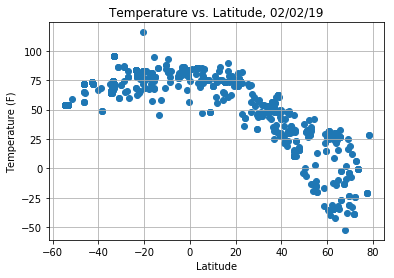

In [8]:
# build a scatter plot for Temperature (F) vs. Latitude
plt.scatter(weather_data["Latitude"], weather_data["Temperature"], marker="o")

plt.title("Temperature vs. Latitude, 02/02/19")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TempVsLat.png")

# Show plot
plt.show()

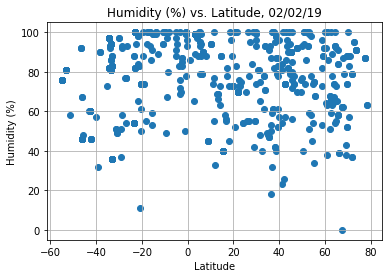

In [9]:
# build a scatter plot for Humidity (%) vs. Latitude
plt.scatter(weather_data["Latitude"], weather_data["Humidity"], marker="o")

plt.title("Humidity (%) vs. Latitude, 02/02/19")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumidityVsLat.png")

# Show plot
plt.show()

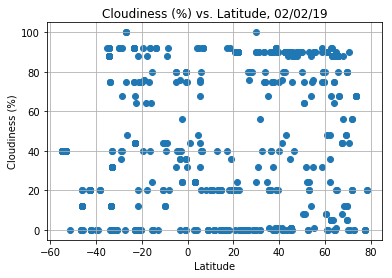

In [10]:
# build a scatter plot for Cloudiness (%) vs. Latitude
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness"], marker="o")

plt.title("Cloudiness (%) vs. Latitude, 02/02/19")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudsVsLat.png")

# Show plot
plt.show()

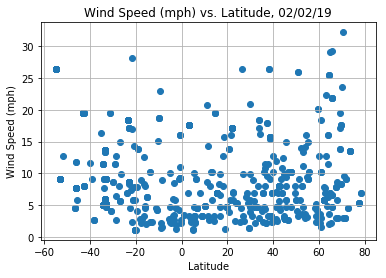

In [11]:
# build a scatter plot for Wind Speed (mph) vs. Latitude
plt.scatter(weather_data["Latitude"], weather_data["Wind Speed"], marker="o")

plt.title("Wind Speed (mph) vs. Latitude, 02/02/19")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WindVsLat.png")

# Show plot
plt.show()